In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data/processed/cleaned.csv')

In [6]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,21.967120,0
1,55,0,156,85.0,140,90,3,1,0,0,1,34.927679,1
2,51,0,165,64.0,130,70,3,1,0,0,0,23.507805,1
3,48,1,169,82.0,150,100,1,1,0,0,1,28.710479,1
4,47,0,156,56.0,100,60,1,1,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66787,57,0,165,80.0,150,80,1,1,0,0,1,29.384757,1
66788,61,0,158,126.0,140,90,2,2,0,0,1,50.472681,1
66789,52,1,183,105.0,180,90,3,1,0,1,0,31.353579,1
66790,61,0,163,72.0,135,80,1,2,0,0,0,27.099251,1


In [7]:
import sklearn
sklearn.__version__

'1.7.2'

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('cardio', axis=1)   
y = df['cardio']               

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print(X_train_scaled)

[[ 0.16660605  1.35044682  1.16861838 ... -0.24389518  0.50270054
   0.1228521 ]
 [ 0.46076441  1.35044682 -0.5226519  ... -0.24389518 -1.98925586
   1.24147288]
 [ 1.34323946 -0.74049566  0.56459328 ... -0.24389518  0.50270054
   0.40547743]
 ...
 [ 0.31368523  1.35044682  1.41022842 ... -0.24389518  0.50270054
  -0.51843919]
 [ 0.01952688 -0.74049566 -1.48909205 ... -0.24389518  0.50270054
   0.86674196]
 [ 0.75492276 -0.74049566 -0.03943182 ... -0.24389518  0.50270054
   1.02238165]]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", acc_lr)

Logistic Regression Accuracy: 0.7262519649674377


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.6917433939666142


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.7027472116176361


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", acc_gb)

Gradient Boosting Accuracy: 0.733737555206228


In [15]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", acc_nb)

Naive Bayes Accuracy: 0.6813384235346958


In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',probability=True)

svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", acc_svm)

SVM Accuracy: 0.733812411108616


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7323152930608579


Logistic Regression
Accuracy : 0.7262519649674377
Precision: 0.7514222503160556
Recall   : 0.6952770872934639
F1 Score : 0.7222601959444065
Confusion Matrix:
 [[4947 1573]
 [2084 4755]]


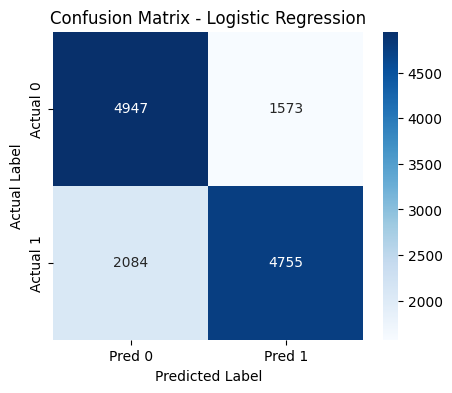

KNN
Accuracy : 0.6917433939666142
Precision: 0.7023650156180277
Recall   : 0.690451820441585
F1 Score : 0.6963574693997936
Confusion Matrix:
 [[4519 2001]
 [2117 4722]]


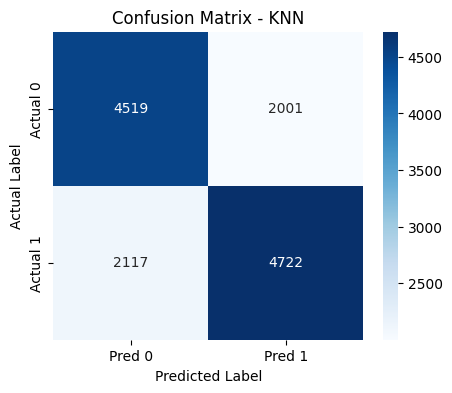

Random Forest
Accuracy : 0.7027472116176361
Precision: 0.7120047309284447
Recall   : 0.7041965199590583
F1 Score : 0.7080791001984856
Confusion Matrix:
 [[4572 1948]
 [2023 4816]]


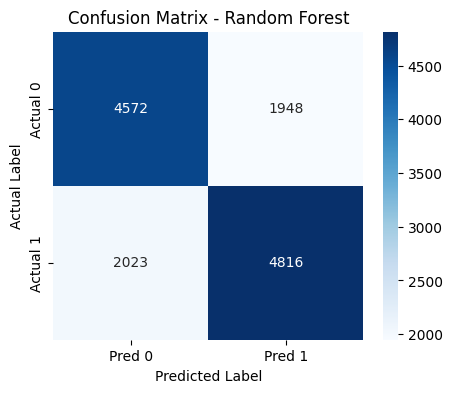

Gradient Boosting
Accuracy : 0.733737555206228
Precision: 0.7537890504175688
Recall   : 0.7126772920017547
F1 Score : 0.7326568959037956
Confusion Matrix:
 [[4928 1592]
 [1965 4874]]


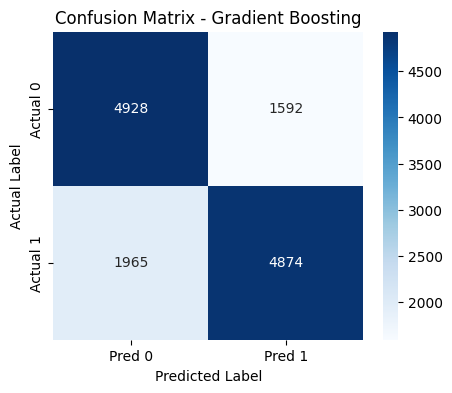

Naive Bayes
Accuracy : 0.6813384235346958
Precision: 0.7577875399361023
Recall   : 0.5549056879660769
F1 Score : 0.6406685236768802
Confusion Matrix:
 [[5307 1213]
 [3044 3795]]


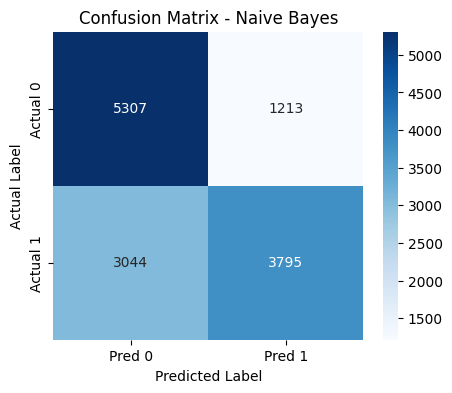

SVM
Accuracy : 0.733812411108616
Precision: 0.7601014102360957
Recall   : 0.7014183360140371
F1 Score : 0.7295817490494296
Confusion Matrix:
 [[5006 1514]
 [2042 4797]]


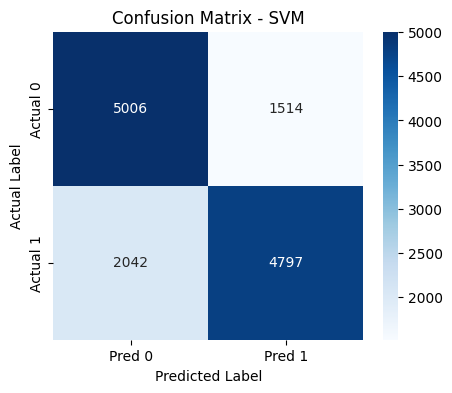

Decision Tree
Accuracy : 0.7323152930608579
Precision: 0.7682064770672365
Recall   : 0.683287030267583
F1 Score : 0.7232626528401176
Confusion Matrix:
 [[5110 1410]
 [2166 4673]]


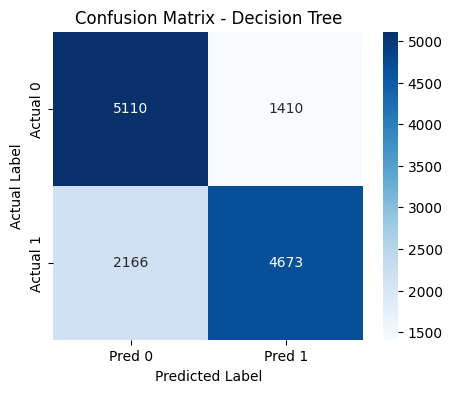

In [18]:
models = {
    "Logistic Regression": (log_reg, X_test_scaled),
    "KNN": (knn, X_test_scaled),
    "Random Forest": (rf, X_test),
    "Gradient Boosting": (gb, X_test),
    "Naive Bayes": (nb, X_test_scaled),
    "SVM": (svm, X_test_scaled),
    "Decision Tree": (dt, X_test)
}

for name, (model, X_eval) in models.items():
    
    y_pred = model.predict(X_eval)
    cm = confusion_matrix(y_test, y_pred)

    print("=" * 50)
    print(name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["Actual 0", "Actual 1"]
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()


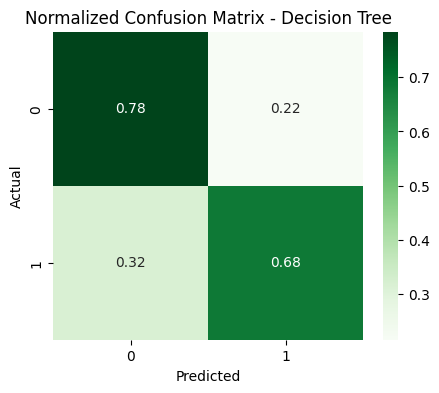

In [19]:
cm_norm = confusion_matrix(y_test, y_pred, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Greens"
)
plt.title(f"Normalized Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## K-Fold Validation 

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", log_reg)
    ]),
    
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", knn)
    ]),
    
    "Naive Bayes": Pipeline([
        ("scaler", StandardScaler()),
        ("model", nb)
    ]),
    
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Decision Tree": dt
    # Don't use SVC cause it's complex and slow for large data
}

In [22]:
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

for name, model in models.items():
    scores = cross_validate(
        model,
        X,
        y,
        cv=kfold,
        scoring=scoring,
        n_jobs=1
    )

    print("=" * 50)
    print(name)
    print("Accuracy :", scores["test_accuracy"].mean())
    print("Precision:", scores["test_precision"].mean())
    print("Recall   :", scores["test_recall"].mean())
    print("F1 Score :", scores["test_f1"].mean())

Logistic Regression
Accuracy : 0.7236645312459375
Precision: 0.7482038877162372
Recall   : 0.6937678932145612
F1 Score : 0.7199278690860914
KNN
Accuracy : 0.6877918276338474
Precision: 0.6977612060306637
Recall   : 0.6883863138395858
F1 Score : 0.6930148910366535
Naive Bayes
Accuracy : 0.681309112572878
Precision: 0.7610480883194801
Recall   : 0.5502587364384443
F1 Score : 0.6387027628824028
Random Forest
Accuracy : 0.6949036662414055
Precision: 0.7028637999249444
Recall   : 0.6999974856708897
F1 Score : 0.7014104415201986
Gradient Boosting
Accuracy : 0.732303291306293
Precision: 0.7528977825408534
Recall   : 0.7103500647396984
F1 Score : 0.7309705160552997
Decision Tree
Accuracy : 0.7297581592317685
Precision: 0.7616937541199
Recall   : 0.6871878084115427
F1 Score : 0.7224963787256419


List Of Models

In [23]:
cv_results = []

for name, model in models.items():
    scores = cross_validate(
        model, X, y,
        cv=kfold,
        scoring=scoring,
        n_jobs=1
    )

    cv_results.append({
        "Model": name,
        "Accuracy": scores["test_accuracy"].mean(),
        "Precision": scores["test_precision"].mean(),
        "Recall": scores["test_recall"].mean(),
        "F1": scores["test_f1"].mean()
    })

cv_df = pd.DataFrame(cv_results).sort_values("F1", ascending=False)
cv_df

,Model,Accuracy,Precision,Recall,F1
4,Gradient Boosting,0.732303,0.752898,0.710350,0.730971
5,Decision Tree,0.729758,0.761694,0.687188,0.722496
0,Logistic Regression,0.723665,0.748204,0.693768,0.719928
3,Random Forest,0.694904,0.702864,0.699997,0.701410
1,KNN,0.687792,0.697761,0.688386,0.693015
2,Naive Bayes,0.681309,0.761048,0.550259,0.638703


## Best 3 Models

In [24]:
top_models = cv_df.head(3)["Model"].tolist()
top_models

['Gradient Boosting', 'Decision Tree', 'Logistic Regression']

## Hyperparameter tuning 

In [25]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Gradient Boosting

In [26]:
gb = GradientBoostingClassifier(random_state=42)

param_gb = {
    "n_estimators": [150],
    "learning_rate": [0.1],
    "max_depth": [3],
    "subsample": [0.8]
}

grid_gb = GridSearchCV(
    gb,
    param_gb,
    cv=cv,
    scoring={'f1': 'f1', 'accuracy': 'accuracy'},
    refit='f1',
    n_jobs=1
)

grid_gb.fit(X, y)

print("Gradient Boosting Best F1 :", grid_gb.best_score_)
print("Best Accuracy :", grid_gb.cv_results_['mean_test_accuracy'][grid_gb.best_index_])

Gradient Boosting Best F1 : 0.7316825208168584
Best Accuracy : 0.7327673900589299


Decision Tree

In [27]:
dt = DecisionTreeClassifier(random_state=42)

param_dt = {
    "max_depth": [3, 5],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 5],
    "criterion": ["gini"]
}

grid_dt = GridSearchCV(
    dt,
    param_dt,
    cv=cv,
    scoring={'f1': 'f1', 'accuracy': 'accuracy'},
    refit='f1',
    n_jobs=1
)

grid_dt.fit(X, y)

print("Decision Tree Best F1 :", grid_dt.best_score_)
print("Best Accuracy :", grid_dt.cv_results_['mean_test_accuracy'][grid_dt.best_index_])

Decision Tree Best F1 : 0.7224963787256419
Best Accuracy : 0.7297581592317685


Logistic Regression

In [28]:
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

param_lr = {
    "model__C": [0.1, 1],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"]
}

grid_lr = GridSearchCV(
    pipe_lr,
    param_lr,
    cv=cv,
    scoring={'f1': 'f1', 'accuracy': 'accuracy'},
    refit='f1',
    n_jobs=1
)

grid_lr.fit(X, y)

print("Logistic Regression Best F1 :", grid_lr.best_score_)
print("Best Accuracy :", grid_lr.cv_results_['mean_test_accuracy'][grid_lr.best_index_])

Logistic Regression Best F1 : 0.7199374092258555
Best Accuracy : 0.7236196143422094


Compare

In [29]:
best_models = {
    "Gradient Boosting": grid_gb.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "Logistic Regression": grid_lr.best_estimator_
}

scores = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    scores[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

best_model_name = max(scores, key=lambda x: scores[x]["f1"])
best_model = best_models[best_model_name]

y_pred = best_model.predict(X_test)

print("=" * 60)
print("Model Scores Summary:")
for name, metrics in scores.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.4f}, F1 = {metrics['f1']:.4f}")

print("=" * 60)
print(f"Best Model is: {best_model_name}")
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("Final Test F1 Score :", f1_score(y_test, y_pred))
print("=" * 60)

Model Scores Summary:
Gradient Boosting: Accuracy = 0.7383, F1 = 0.7369
Decision Tree: Accuracy = 0.7349, F1 = 0.7278
Logistic Regression: Accuracy = 0.7257, F1 = 0.7218
Best Model is: Gradient Boosting
Final Test Accuracy: 0.7383037652518901
Final Test F1 Score : 0.7368658738521752


In [30]:
import pickle

best_model_name = "Gradient Boosting"

model_package = {
    "model_name": best_model_name,
    "model": best_model,
    "metric": "f1"
}

with open("final_model.pkl", "wb") as f:
    pickle.dump(model_package, f)

print("Gradient Boosting model saved as final_model.pkl")


Gradient Boosting model saved as final_model.pkl
